<a href="https://colab.research.google.com/github/Shubhbetter/Voyage-Analytics-Integrating-MLOps-in-Travel-Productionization-of-ML-Systems/blob/main/Voyage_Analytics_Integrating_MLOps_for_Predictive_and_Recommender_Systems_in_Travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Voyage_Analytics_Integrating_MLOps_for_Predictive_and_Recommender_Systems_in_Travel



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team


# **Project Summary -**

The project’s primary goal is to leverage data analytics and machine learning to revolutionize the travel and tourism industry. The project includes three datasets, namely users, hotels, and flights, which are then utilized to optimize and train machine learning models. The models are then used to predict flights and hotel prices based on various features and enhance the user experience to assist users in making informed travel-related decisions. The primary objectives include: flight price prediction: a model to predict flight prices based on the flights table using regression, including the factors such as flight name and type, origin, and destination and accept other relevant vector columns. The flask-based REST API is developed to perform real-time predictions and display pricing. The use of the flight price prediction model.

# **GitHub Link -**

https://github.com/Shubhbetter/Voyage-Analytics-Integrating-MLOps-in-Travel-Productionization-of-ML-Systems/new/main

# **Problem Statement**


The ability to predict what the cost of travel will be to consumers and render personalized recommendations is key in improving customer satisfaction, cutting down operational efficiency. However, there are several challenges that the industry faces:

Price Stability: Flight prices price can vary due to demand, seasonality & economic conditions. There is an issue with travelers finding the perfect pricing of it and there are no really accurate systems in travel agencies to predict prices.

Personalized recommendations: In most case, travelers are only provided with unpersonalized travel advice which was not based on the traveler's history of preferences. All of this leads to a poor user experience and very little customer retention rates.

Poor Data Management and Deployment: Most travel companies do not have the facilities for efficient data management or deployment of machine learning models that operate at both a low latency plus high throughput levels.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV , cross_val_score, KFold

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [ ]:
# Importing user dataset
url = 'https://drive.google.com/file/d/1JSbbrQKr-9oGQYQbRv9ALOMWrbaoq1lo/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
user = pd.read_csv(url, encoding='latin1')

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [ ]:
# Importing hotel dataset
url = 'https://drive.google.com/file/d/1NCKwpNL0WIVf-mjyZTEzSyIjIsfFYpSm/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
hotel = pd.read_csv(url, encoding='latin1')

In [ ]:
# Importing flights dataset
url = 'https://drive.google.com/file/d/1NL1SFVoGPsRGy4jEKV215iActi8yL6jE/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
flights = pd.read_csv(url, encoding='latin1')

### Dataset First View

In [ ]:
# Dataset First Look
user.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [ ]:
# Rename the column
user.rename(columns={'id':'userCode','name':'user_name'},inplace=True)

In [ ]:
# Dataset First Look
hotel.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [ ]:
# Rename the column
hotel.rename(columns={'name':'hotel_name','price':'hotel_price','date':'hotel_date'},inplace=True)

In [ ]:
# Dataset First Look
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
user.shape

(1340, 5)

In [ ]:
# Dataset Rows & Columns count
hotel.shape

(40552, 8)

In [ ]:
# Dataset Rows & Columns count
flights.shape

(271888, 10)

### Merging the datasets

In [ ]:
# Merge flights with users on userCode
flights_users = pd.merge(flights, user, left_on='userCode', right_on='code', how='left')

# Merge the result with hotels on travelCode and userCode
merged_data = pd.merge(flights_users, hotel, on=['travelCode', 'userCode'], how='left')

### Dataset Information

In [ ]:
# Dataset Info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   travelCode   271888 non-null  int64  
 1   userCode     271888 non-null  int64  
 2   from         271888 non-null  object 
 3   to           271888 non-null  object 
 4   flightType   271888 non-null  object 
 5   price        271888 non-null  float64
 6   time         271888 non-null  float64
 7   distance     271888 non-null  float64
 8   agency       271888 non-null  object 
 9   date         271888 non-null  object 
 10  code         271888 non-null  int64  
 11  company      271888 non-null  object 
 12  user_name    271888 non-null  object 
 13  gender       271888 non-null  object 
 14  age          271888 non-null  int64  
 15  hotel_name   81104 non-null   object 
 16  place        81104 non-null   object 
 17  days         81104 non-null   float64
 18  hotel_price  81104 non-n

### Rename the columns

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
merged_data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
merged_data.isnull().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
merged_data.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'code', 'company', 'user_name', 'gender',
       'age', 'hotel_name', 'place', 'days', 'hotel_price', 'total',
       'hotel_date'],
      dtype='object')

In [ ]:
# Dataset Describe
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
travelCode,271888.0,67971.500000,39243.724665,0.00,33985.75,67971.50,101957.25,135943.00
userCode,271888.0,667.505495,389.523127,0.00,326.00,659.00,1011.00,1339.00
price,271888.0,957.375030,362.311890,301.51,672.66,904.00,1222.24,1754.17
time,271888.0,1.421147,0.542541,0.44,1.04,1.46,1.76,2.44
distance,271888.0,546.955535,208.851288,168.22,401.66,562.14,676.53,937.77
code,271888.0,667.505495,389.523127,0.00,326.00,659.00,1011.00,1339.00
age,271888.0,42.815005,12.946294,21.00,32.00,42.00,54.00,65.00
days,81104.0,2.499679,1.119319,1.00,1.00,2.00,4.00,4.00
hotel_price,81104.0,214.439554,76.741832,60.39,165.99,242.88,263.41,313.02
total,81104.0,536.229513,319.329514,60.39,247.62,495.24,742.86,1252.08


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in list(merged_data.columns):
  print(f'{i} : {merged_data[i].nunique()}')

travelCode : 135944
userCode : 1335
from : 9
to : 9
flightType : 3
price : 490
time : 33
distance : 35
agency : 3
date : 999
code : 1335
company : 5
user_name : 1333
gender : 3
age : 45
hotel_name : 9
place : 9
days : 4
hotel_price : 9
total : 36
hotel_date : 199


In [ ]:
merged_data

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,...,company,user_name,gender,age,hotel_name,place,days,hotel_price,total,hotel_date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,...,4You,Roy Braun,male,21,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,...,4You,Roy Braun,male,21,Hotel A,Florianopolis (SC),4.0,313.02,1252.08,09/26/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019,...,4You,Roy Braun,male,21,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019,...,4You,Roy Braun,male,21,NaN,NaN,NaN,NaN,NaN,NaN
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,...,4You,Roy Braun,male,21,Hotel K,Salvador (BH),2.0,263.41,526.82,10/10/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020,...,Umbrella LTDA,Paul Rodriguez,male,35,Hotel BW,Campo Grande (MS),3.0,60.39,181.17,07/09/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020,...,Umbrella LTDA,Paul Rodriguez,male,35,Hotel BD,Natal (RN),4.0,242.88,971.52,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020,...,Umbrella LTDA,Paul Rodriguez,male,35,Hotel BD,Natal (RN),4.0,242.88,971.52,07/16/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020,...,Umbrella LTDA,Paul Rodriguez,male,35,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check Unique Values for each variable.
for i in list(merged_data.columns):
    print(f'{i} : {merged_data[i].value_counts()}')

travelCode : travelCode
135943    2
0         2
1         2
2         2
3         2
         ..
12        2
11        2
10        2
9         2
8         2
Name: count, Length: 135944, dtype: int64
userCode : userCode
571     400
925     400
241     400
1026    400
322     400
       ... 
406       2
588       2
463       2
1016      2
527       2
Name: count, Length: 1335, dtype: int64
from : from
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64
to : to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64
flightType : fli

## 3. ***Data Wrangling***

### Data Wrangling Code

### What all manipulations have you done and insights you found?

In [ ]:
# flights.set_index('date',inplace=True)

In [ ]:
merged_data.head().T

,0,1,2,3,4
travelCode,0,0,1,1,2
userCode,0,0,0,0,0
from,Recife (PE),Florianopolis (SC),Brasilia (DF),Florianopolis (SC),Aracaju (SE)
to,Florianopolis (SC),Recife (PE),Florianopolis (SC),Brasilia (DF),Salvador (BH)
flightType,firstClass,firstClass,firstClass,firstClass,firstClass
price,1434.38,1292.29,1487.52,1127.36,1684.05
time,1.76,1.76,1.66,1.66,2.16
distance,676.53,676.53,637.56,637.56,830.86
agency,FlyingDrops,FlyingDrops,CloudFy,CloudFy,CloudFy
date,09/26/2019,09/30/2019,10/03/2019,10/04/2019,10/10/2019


Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

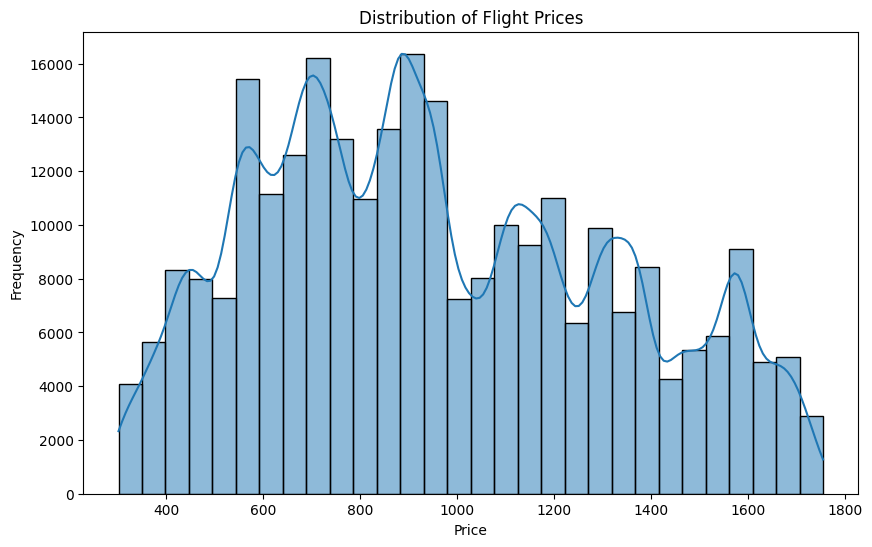

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(flights['price'], kde=True, bins=30)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### 1. Why did you pick the specific chart?

* I picked a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of flight prices. This chart effectively shows the frequency of different price ranges and provides a smooth estimate of the underlying distribution.

##### 2. What is/are the insight(s) found from the chart?

* The chart reveals the distribution of flight prices, highlighting the most common price ranges and indicating how prices are spread out.

* It can help identify peaks (most frequent prices) and the overall variability in flight prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, the insights can help create a positive business impact by informing pricing strategies. Understanding the distribution of prices can help the company set competitive prices, identify pricing trends, and tailor marketing strategies to target different customer segments effectively.

Answer Here

#### Chart - 2

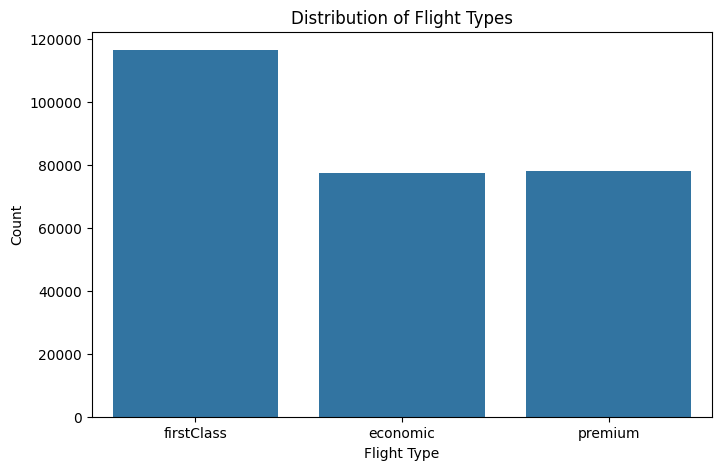

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(data=flights, x='flightType')
plt.title('Distribution of Flight Types')
plt.xlabel('Flight Type')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

* A bar plot is ideal for showing the frequency distribution of categorical variables like flight types.

##### 2. What is/are the insight(s) found from the chart?

* The chart reveals the most and least common flight types, providing insights into customer preferences.

* Most of the People choose firstClass over economic and premium

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, knowing popular flight types can help in optimizing service offerings and marketing strategies.

#### Chart - 3

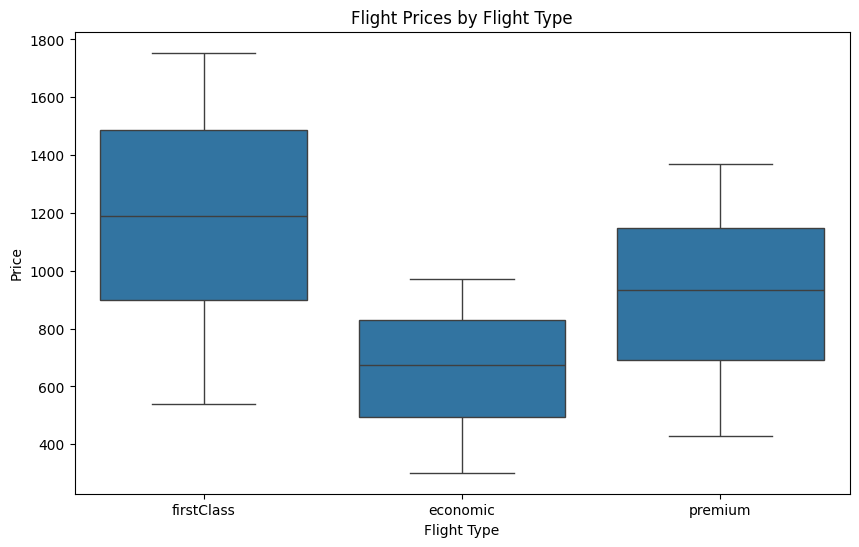

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=flights, x='flightType', y='price')
plt.title('Flight Prices by Flight Type')
plt.xlabel('Flight Type')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

* Box plots are effective for comparing the distribution of a numerical variable across different categories.

##### 2. What is/are the insight(s) found from the chart?

* There are significant differences in price distributions across different flight types, with firstClass flight types being consistently more expensive than premium and ecomic .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, this information can help in pricing strategy and service differentiation.

Answer Here

#### Chart - 4

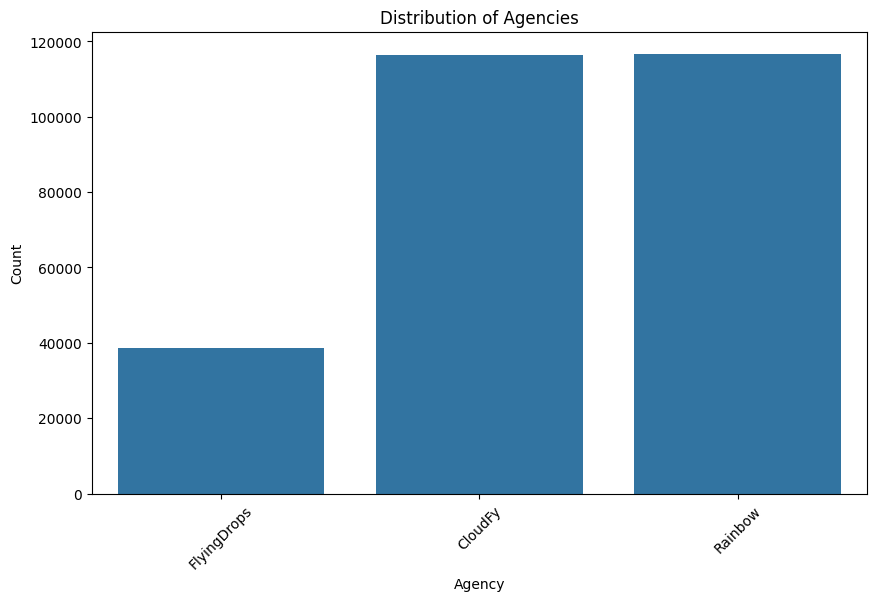

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(data=flights, x='agency')
plt.title('Distribution of Agencies')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

* A bar plot is suitable for showing the frequency distribution of categorical variables like agencies.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows which agencies are most active in the market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, understanding agency activity can help in strategic partnerships and market positioning.

#### Chart - 5

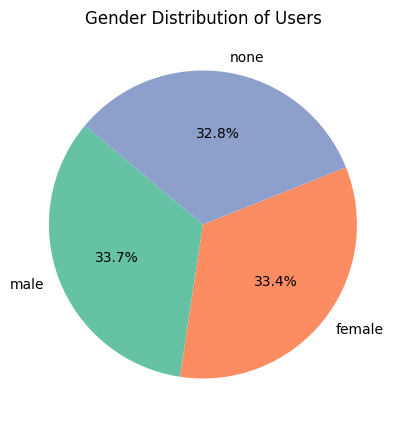

In [ ]:
# Count the occurrences of each gender category
gender_counts = user['gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'], startangle=140)
plt.title("Gender Distribution of Users")
plt.show()

##### 1. Why did you pick the specific chart?

* Pie charts makes it easier to compare absolute counts than a pie chart.

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* The charts reveals that dataset is balanced but there is problem that 32.8 % values are None that means we don't know the value of gender over here


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, this can help in negotiating with agencies and understanding market dynamics.

#### Chart - 6

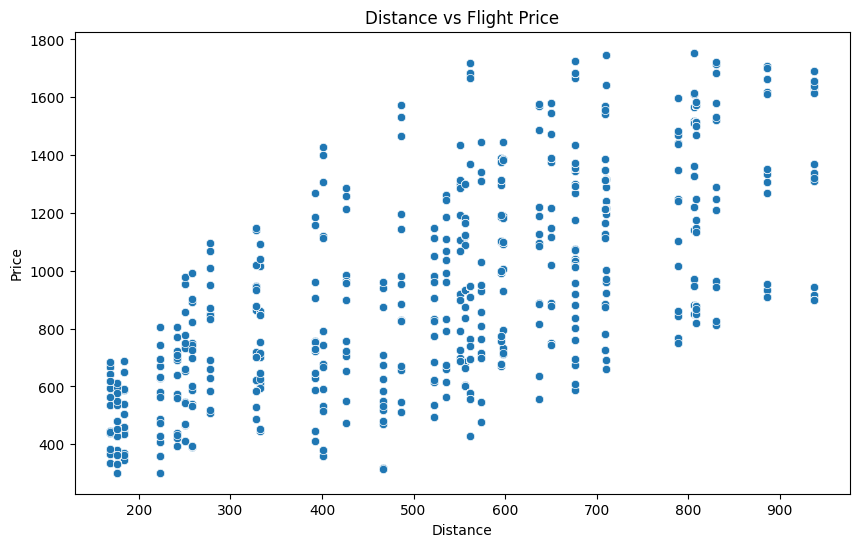

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights, x='distance', y='price')
plt.title('Distance vs Flight Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

* Scatter plots are effective for visualizing relationships between two numerical variables.


##### 2. What is/are the insight(s) found from the chart?

* There appears to be a positive correlation between distance and price, indicating that longer flights tend to be more expensive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, this insight can help in pricing flights based on distance and understanding cost drivers.

#### Chart - 7

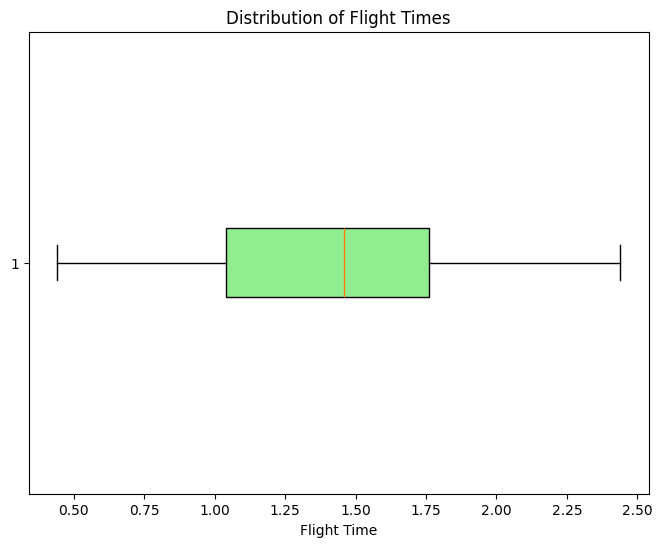

In [ ]:
# chart number 7
plt.figure(figsize=(8, 6))
plt.boxplot(merged_data['time'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Flight Time')
plt.title('Distribution of Flight Times')
plt.savefig('chart2.png')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is useful for displaying the distribution of a numerical variable, especially for identifying outliers. It shows the median, quartiles, and potential outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

 The box plot of flight times shows the median flight time and the interquartile range. There are a few potential outliers (points beyond the whiskers) indicating unusually long flight times. This could be investigated further. Most flight times seem to fall within a specific range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive: Manage customer expectations regarding flight durations and improve scheduling efficiency.
* Negative: Outliers (very long flights) could be due to delays or specific routes, and these should be addressed to improve customer satisfaction.
* Positive: Consider offering different flight options with varying durations to cater to customer preferences.

#### Chart - 8

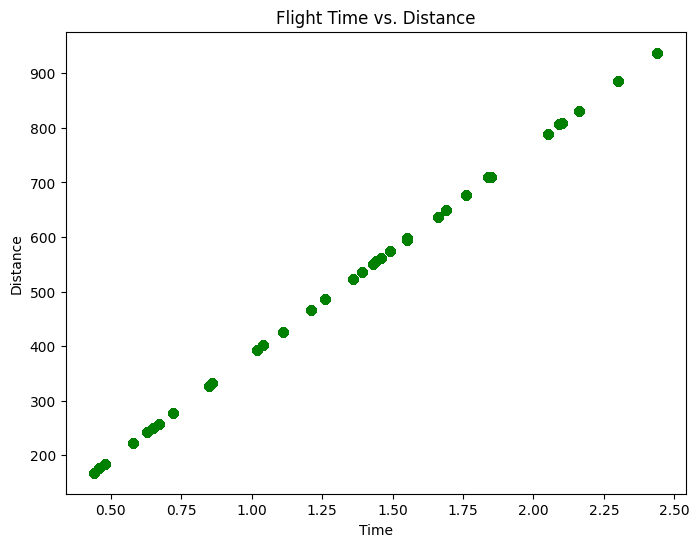

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['time'], merged_data['distance'], color='green', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Flight Time vs. Distance')
plt.savefig('chart6.png')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing the correlation between two continuous numerical variables (Time and Distance).

##### 2. What is/are the insight(s) found from the chart?

* There is a strong positive linear correlation between Flight Time and Distance.

* The data points align closely, indicating a consistent relationship (possibly a constant speed assumption).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in predicting flight distance based on time.

#### Chart - 9

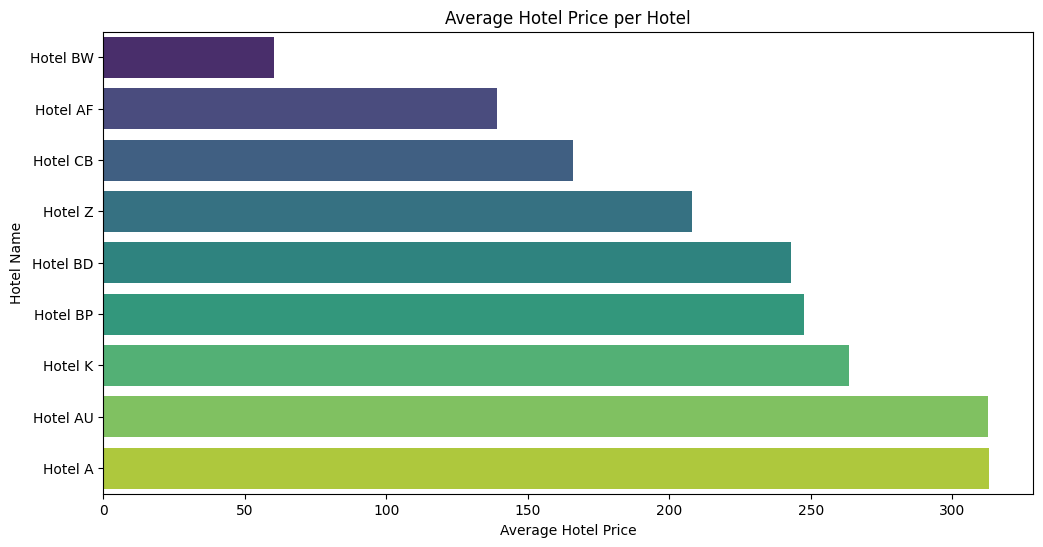

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12, 6))
avg_hotel_price = hotel.groupby("hotel_name")["hotel_price"].mean().sort_values()
sns.barplot(x=avg_hotel_price.values, y=avg_hotel_price.index, palette="viridis")
plt.xlabel("Average Hotel Price")
plt.ylabel("Hotel Name")
plt.title("Average Hotel Price per Hotel")
plt.show()

##### 1. Why did you pick the specific chart?

A **horizontal bar chart** was chosen because it effectively displays categorical data (hotel names) against a continuous variable (average hotel price). This makes it easy to compare hotel prices visually, especially when dealing with long hotel names, which are better represented horizontally.

##### 2. What is/are the insight(s) found from the chart?

- **Hotel BW is the cheapest**: It has the lowest average price, which could indicate budget-friendly accommodations.  
- **Hotels AU and A are the most expensive**: They may offer premium services or target high-end customers.  
- **Mid-range hotels**: The majority of hotels fall within a middle price bracket, which could indicate competitive pricing.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help in pricing strategy, marketing, and customer targeting.  
- **Positive Impact**:  
  - Hotels with higher prices can justify their premium rates by offering exclusive services.  
  - Budget-friendly hotels can attract price-sensitive customers.  
  - Mid-range hotels can focus on promotions to gain a competitive edge.  

- **Negative Growth Concerns**:  
  - If high-priced hotels fail to provide matching value, customers may switch to competitors.  
  - If low-priced hotels struggle with profitability, they may need to adjust pricing or cut costs.  
  - Understanding demand elasticity is crucial to avoid pricing mismatches that could reduce bookings.

#### Chart - 10

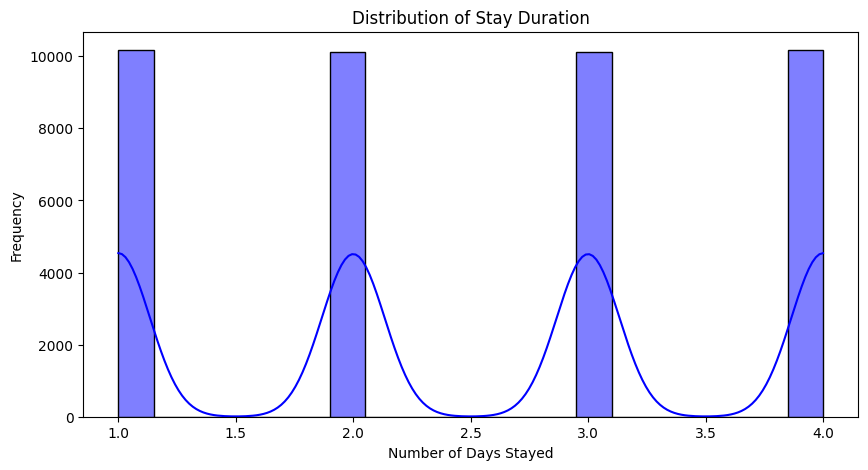

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 5))
sns.histplot(hotel["days"], bins=20, kde=True, color="blue")
plt.xlabel("Number of Days Stayed")
plt.ylabel("Frequency")
plt.title("Distribution of Stay Duration")
plt.show()


##### 1. Why did you pick the specific chart?

A **histogram with a KDE (Kernel Density Estimate) plot** was selected because it effectively visualizes the frequency distribution of stay durations. The histogram shows the exact counts for each stay duration, while the KDE smooths the distribution, making trends easier to observe.

##### 2. What is/are the insight(s) found from the chart?

- **Stay durations are highly discrete**: The data is concentrated at specific whole numbers (1, 2, 3, and 4 days), with no fractional values.  
- **Even distribution among durations**: Each of these four durations has a similar frequency, meaning customers tend to book for these specific time frames.  
- **Gaps between bars**: Indicates that people do not stay for durations like 1.5, 2.5, or 3.5 days, which suggests fixed hotel booking policies (e.g., full-day charges).  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help in optimizing pricing strategies, promotions, and operational planning.  
- **Positive Impact**:  
  - Hotels can offer discounts for longer stays if they want to encourage customers to stay beyond the common durations.  
  - Hotels can optimize room availability by prioritizing bookings of 1 to 4 days to maximize occupancy.  
  - Special offers can be introduced for less popular durations to balance demand.  

- **Negative Growth Concerns**:  
  - If a hotel relies on longer stays, they might face occupancy gaps due to the preference for shorter stays.  
  - Fixed-duration stays could limit flexibility, leading some customers to choose alternative accommodations that offer hourly or half-day pricing.

#### Chart - 11

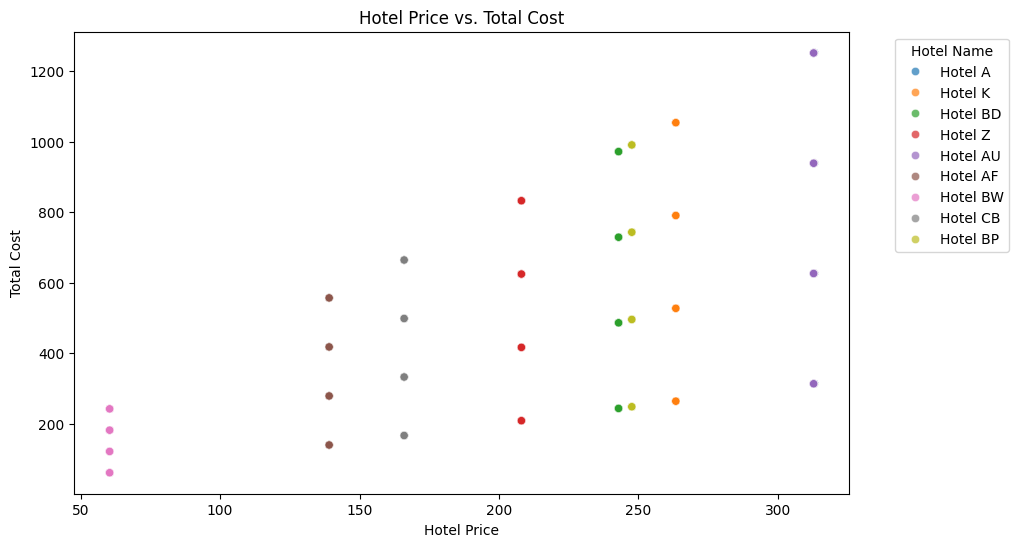

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hotel["hotel_price"], y=hotel["total"], hue=hotel["hotel_name"], palette="tab10", alpha=0.7)
plt.xlabel("Hotel Price")
plt.ylabel("Total Cost")
plt.title("Hotel Price vs. Total Cost")
plt.legend(title="Hotel Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##### 1. Why did you pick the specific chart?

A **scatter plot** helps visualize the relationship between **Hotel Price** and **Total Cost**, showing trends across different hotels.

##### 2. What is/are the insight(s) found from the chart?

- **Higher hotel prices** generally lead to **higher total costs**, indicating longer stays.  
- **Popular price points** (e.g., 150, 250, 300) suggest strategic pricing opportunities.  
- **Variability in total cost** shows differences in stay duration and booking patterns.  

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive**: Optimizing pricing strategies, offering extended-stay discounts, and targeting high-value customers.

**Negative**: High-priced hotels with short stays may struggle with retention; low-priced long stays may strain resources.

#### Chart - 12

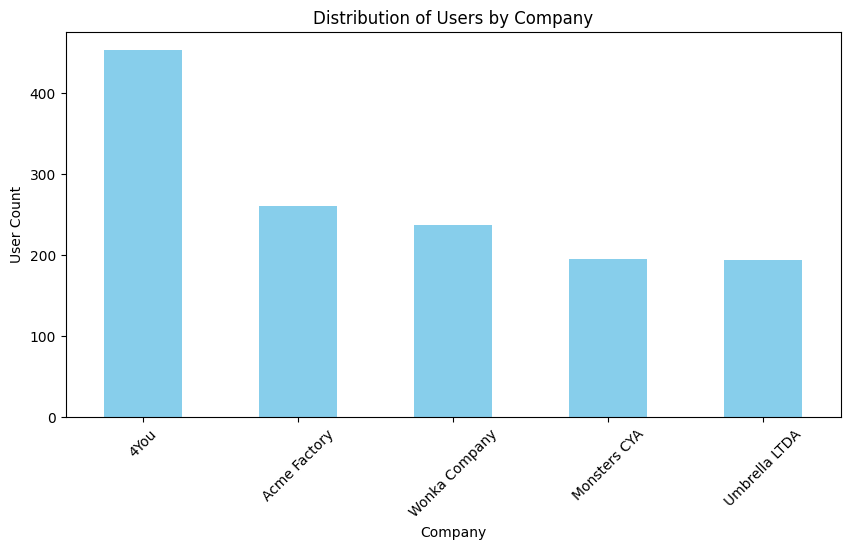

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 5))
user['company'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Users by Company")
plt.xlabel("Company")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing categorical data, such as the number of users per company. It provides a clear visual representation of how users are distributed across different companies, making it easy to identify the company with the highest and lowest number of users.

##### 2. What is/are the insight(s) found from the chart?

* The company "4You" has the highest number of users, significantly more than the others.
* Companies like "Monsters CYA" and "Umbrella LTDA" have relatively fewer users.
* The distribution suggests that some companies are attracting more users than others, possibly due to better services, brand reputation, or market presence.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help businesses in multiple ways:

* Companies with higher user counts can analyze what they are doing well (pricing, customer satisfaction, brand loyalty) and continue optimizing their strategies.

* a company has a significantly lower number of users, it may indicate customer dissatisfaction, weak market reach, or ineffective business strategies.

#### Chart - 13

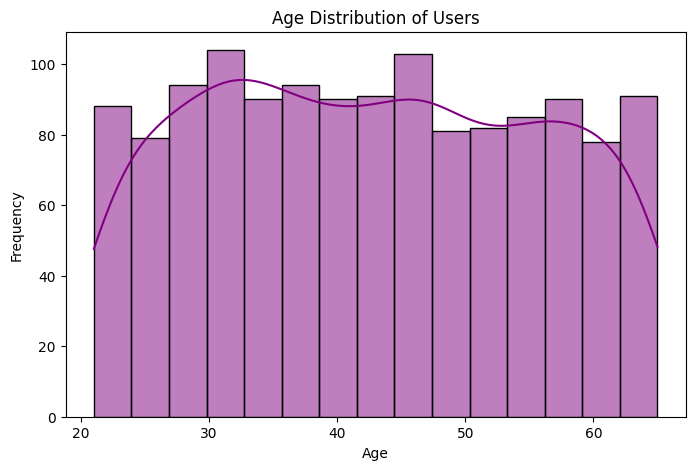

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(8, 5))
sns.histplot(user['age'], bins=15, kde=True, color='purple')
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the best choice for visualizing the distribution of a continuous variable like age. It helps identify the spread, concentration, and possible skewness of user demographics. The KDE (Kernel Density Estimation) line adds a smooth curve to show the general trend in user age distribution.

##### 2. What is/are the insight(s) found from the chart?

* Users are spread across different age groups, but there are peaks in certain age ranges, particularly around 30-35 and 50-55 years.
* There is no extreme skewness, indicating a fairly balanced user base.
* The drop in frequency at the youngest and oldest age groups suggests fewer users in these categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help businesses in various ways:

* Targeted Marketing: If most users fall within 30-55 years, businesses can focus on products and marketing strategies tailored to this demographic.

* If a company relies on younger users but the data shows fewer in the 20-25 age range, it could indicate a problem with branding, accessibility, or relevance for younger audiences.



#### Chart - 14 - Correlation Heatmap

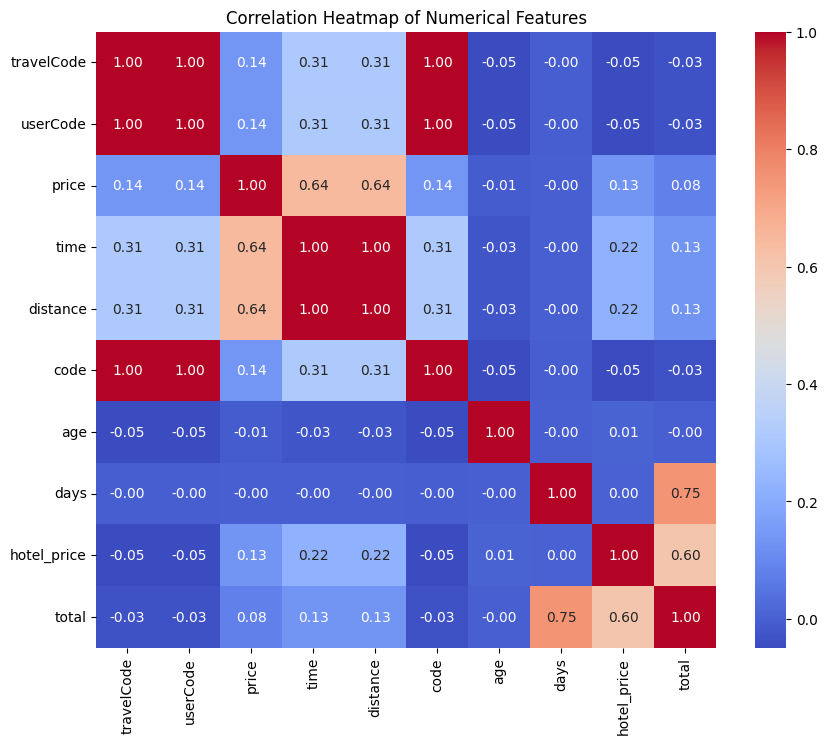

In [ ]:
# Correlation Heatmap visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
numerical_cols = merged_data.select_dtypes(include=['number']).columns
correlation_matrix = merged_data[numerical_cols].corr()

plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen because it visually represents the relationships between multiple numerical variables in a single view. This is particularly useful when analyzing large datasets, as it allows us to quickly identify strong or weak correlations between features.

##### 2. What is/are the insight(s) found from the chart?

- **Strong Correlations:**  
  - **Days vs. Total (0.75)**: The total cost is highly correlated with the number of days, which makes sense as longer stays increase expenses.  
  - **Hotel Price vs. Total (0.60)**: Hotel prices have a significant impact on the total expenditure.  
  - **Price vs. Time & Distance (0.64)**: The cost is influenced by both travel time and distance, suggesting longer trips cost more.  

- **Weak or No Correlation:**  
  - **Age vs. Any Feature**: Age does not significantly impact travel costs, time, or any other major feature, meaning user age does not drive pricing decisions.  
  - **User Code vs. Financial Factors**: The unique identifier for users does not affect price, time, or total spending.  


#### Chart - 15 - Pair Plot

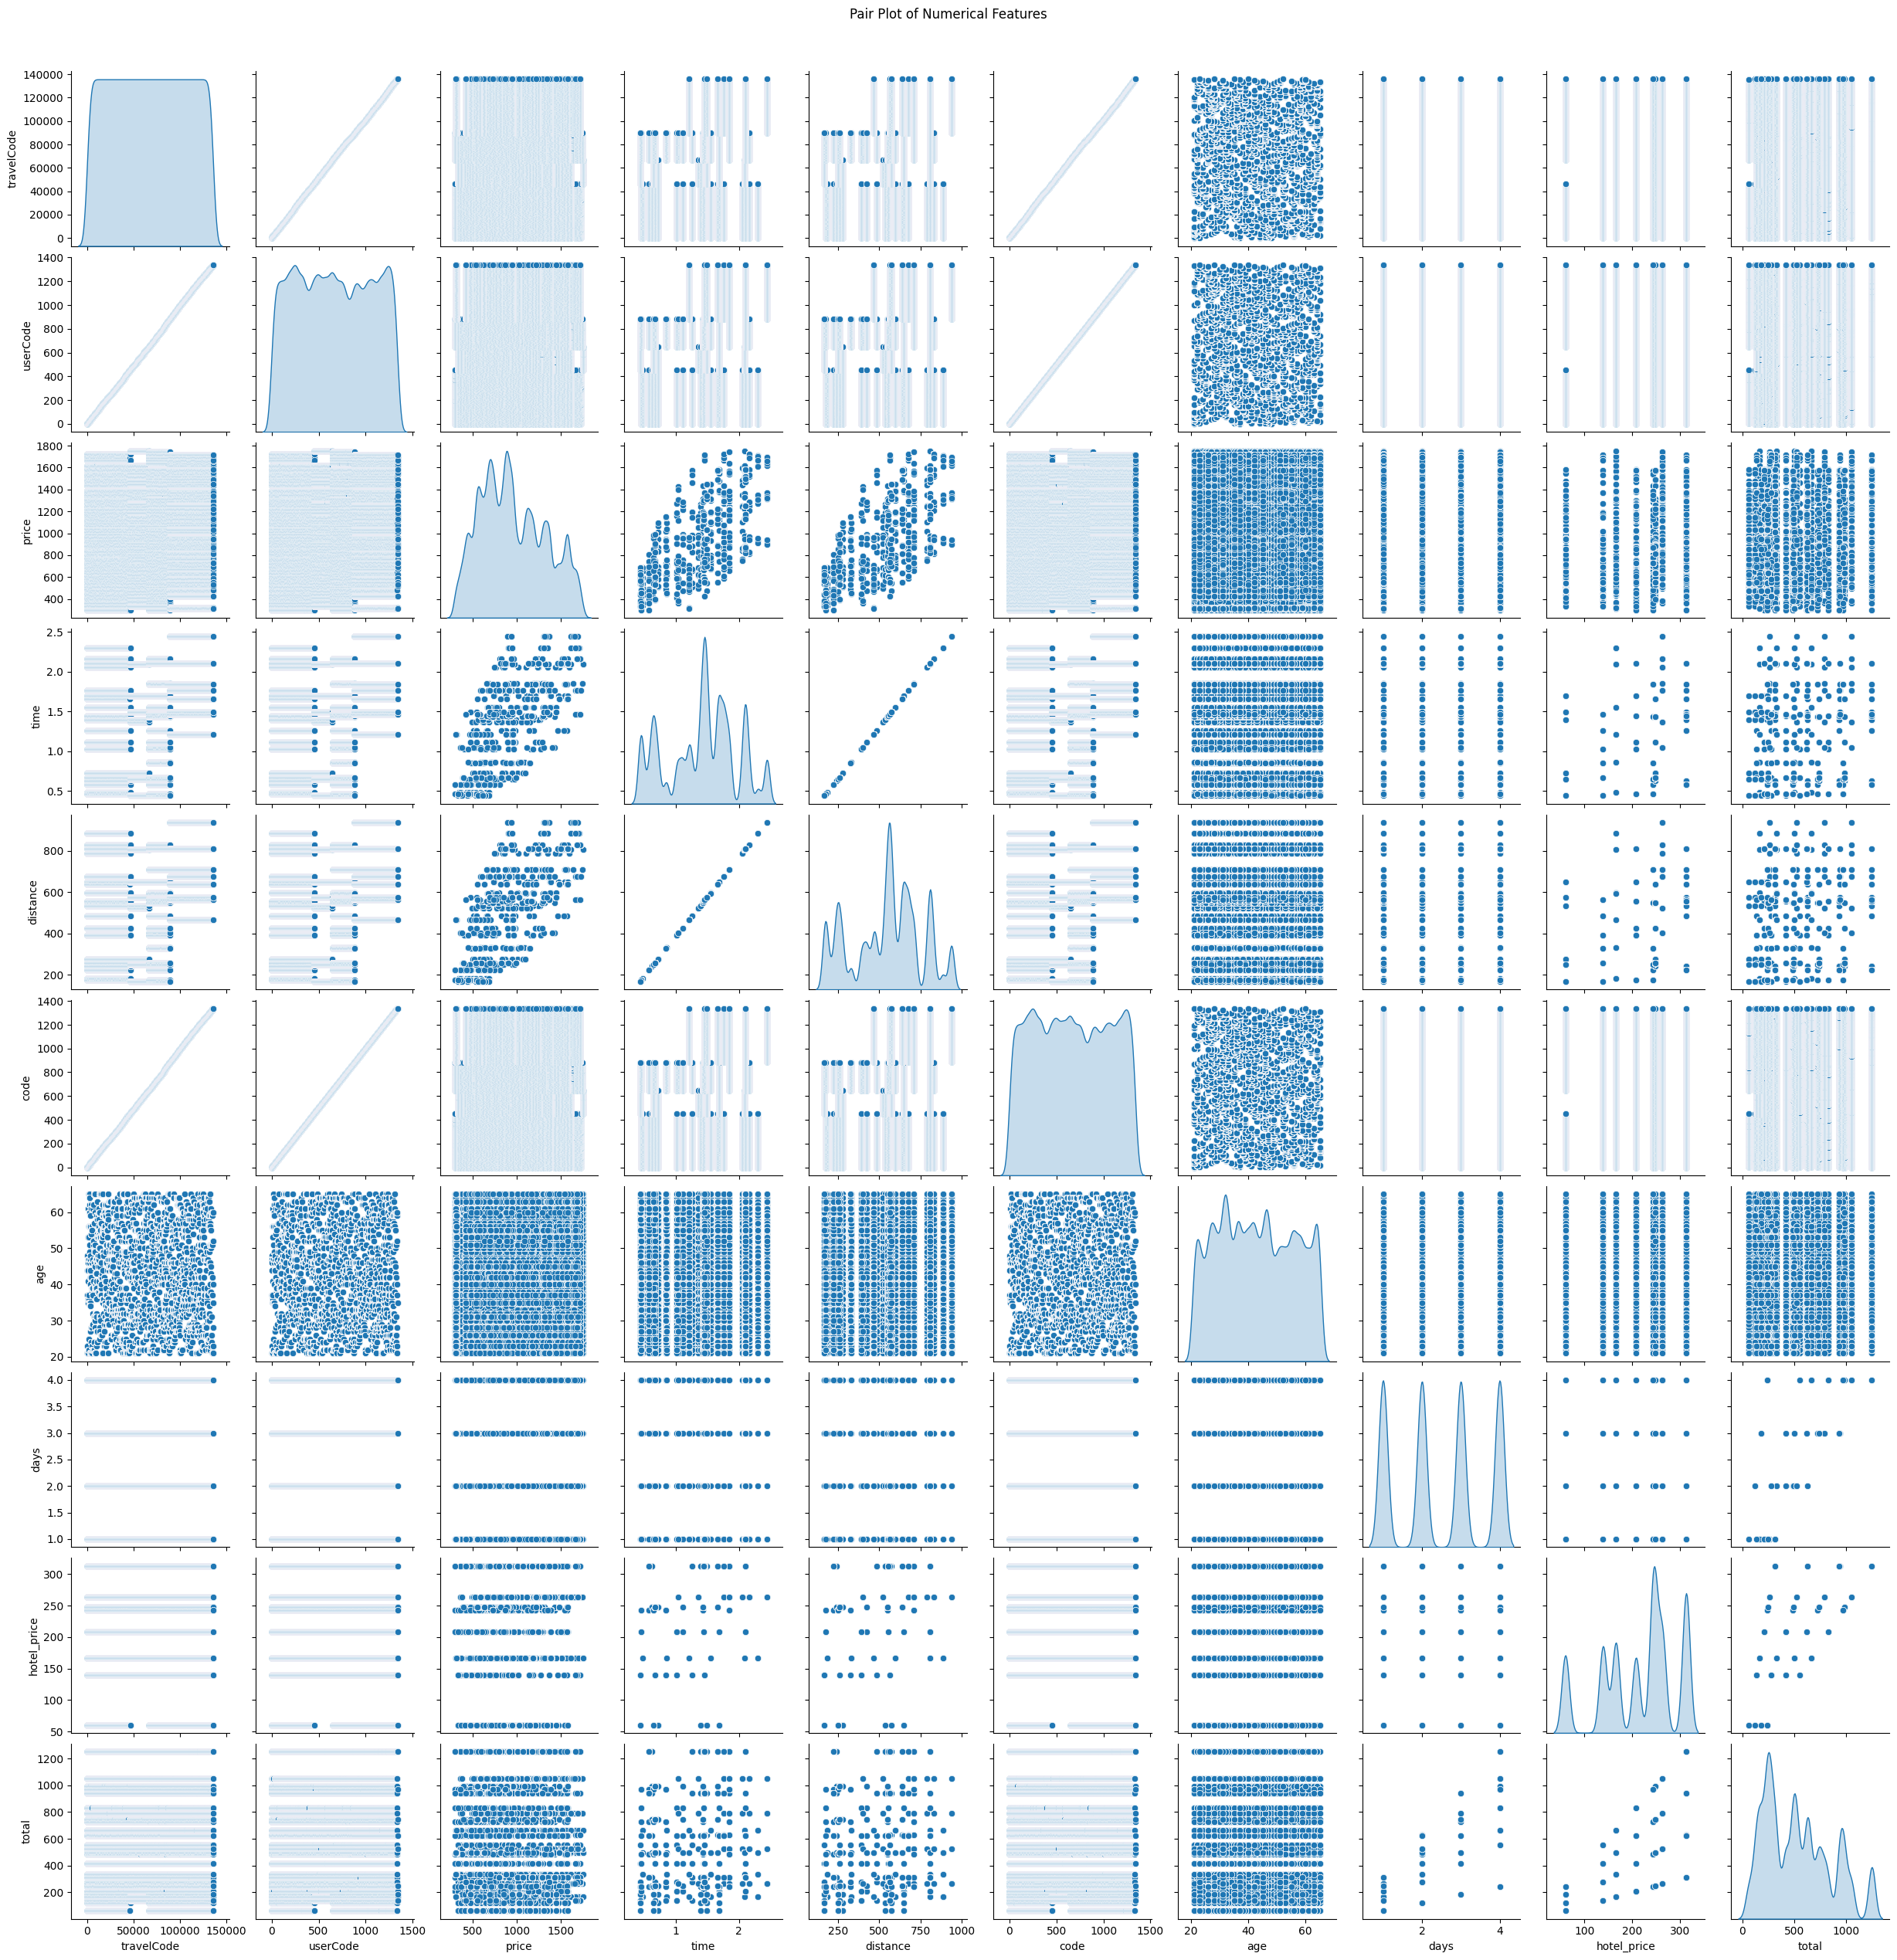

In [ ]:
# Pair Plot visualization code
import seaborn as sns
import matplotlib.pyplot as plt
# Example columns

sns.pairplot(merged_data[numerical_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)  # Add a title
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.A pair plot helps visualize relationships between numerical features, detect correlations, spot outliers, and understand feature distributions—all essential for exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?



1. **Correlations:**  
   - Strong correlation likely exists between **"Time"** and another feature (possibly "Days" or "Age") due to the diagonal alignment in scatter plots.
   - If **"Amount"** and **"Balance"** are present, they might show multicollinearity.

2. **Feature Distributions:**  
   - Features like **"Age"** and **"Days"** might have skewed distributions, requiring transformation.

3. **Outliers:**  
   - Some scatter plots show sparse points away from dense clusters, possibly in **"Amount"** or **"Balance"**.


### **Univariate Analysis**

In [ ]:
num_data = merged_data.select_dtypes(include=['int','float'])
num_data.head()

,travelCode,userCode,price,time,distance,code,age,days,hotel_price,total
0,0,0,1434.38,1.76,676.53,0,21,4.0,313.02,1252.08
1,0,0,1292.29,1.76,676.53,0,21,4.0,313.02,1252.08
2,1,0,1487.52,1.66,637.56,0,21,NaN,NaN,NaN
3,1,0,1127.36,1.66,637.56,0,21,NaN,NaN,NaN
4,2,0,1684.05,2.16,830.86,0,21,2.0,263.41,526.82


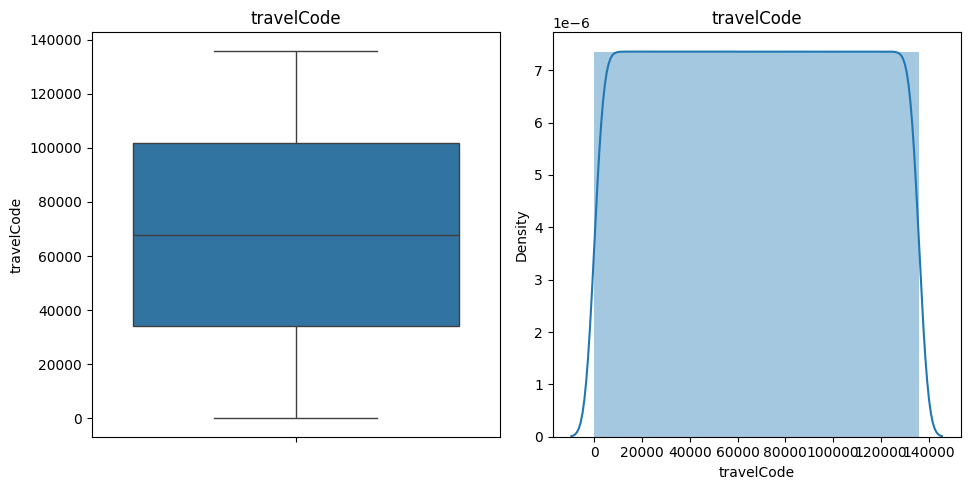

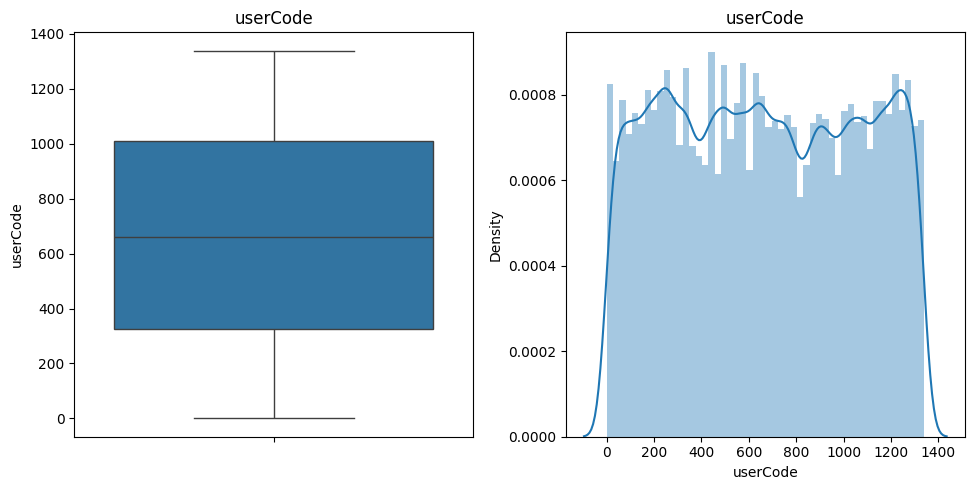

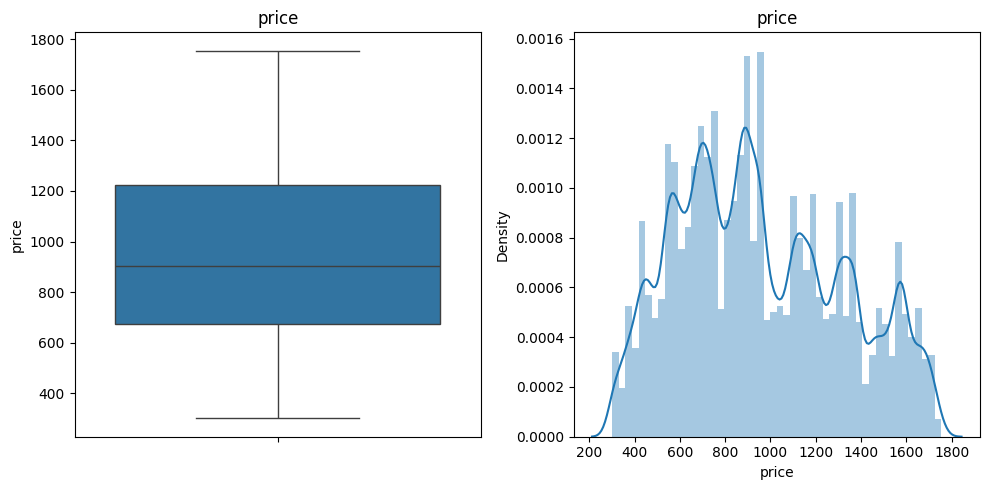

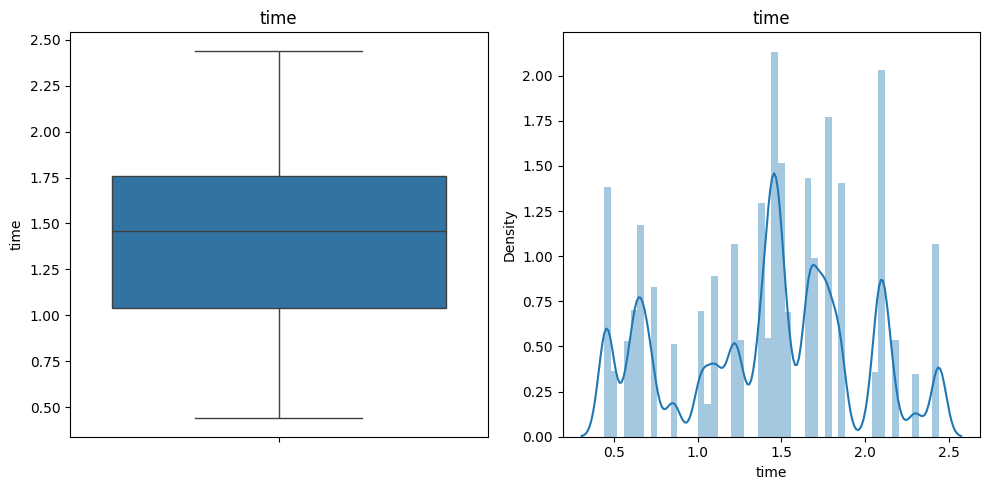

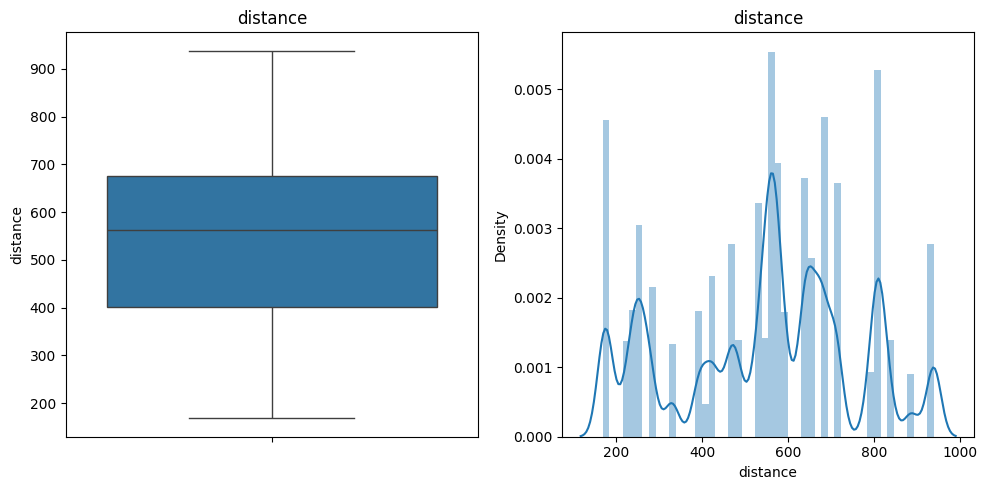

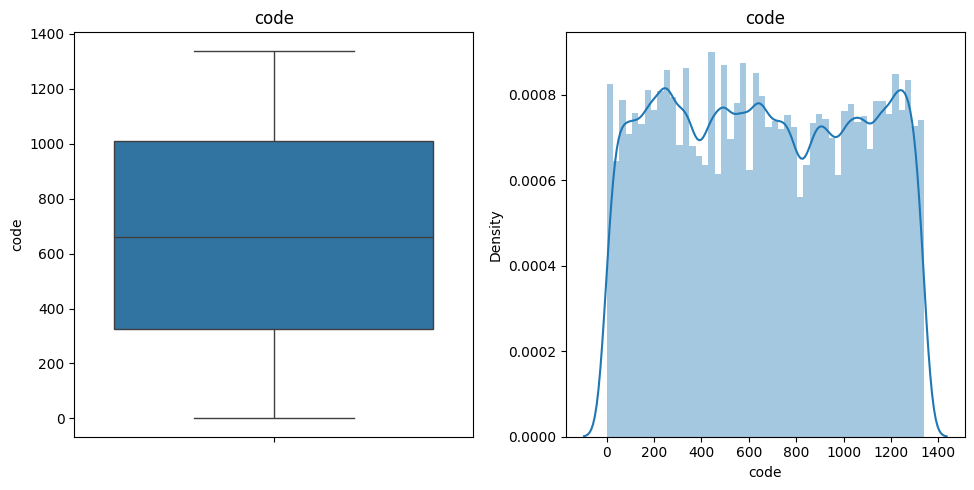

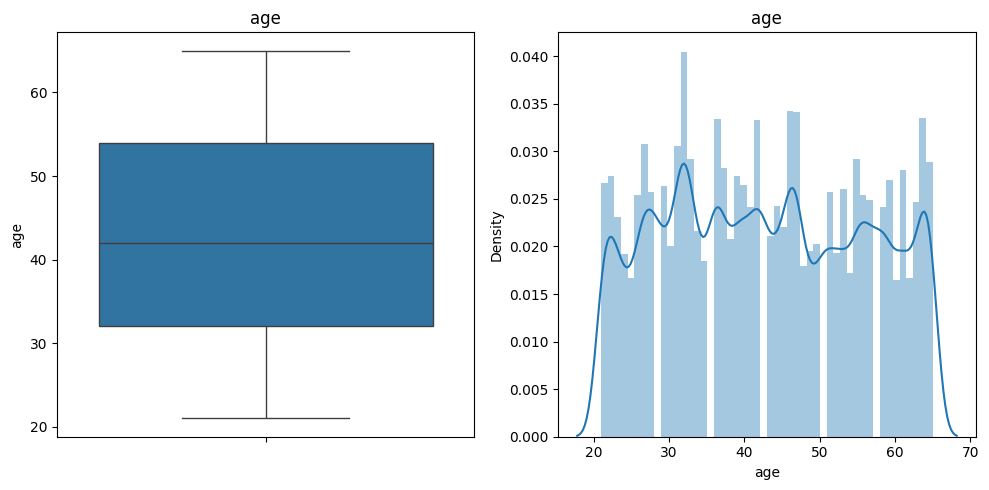

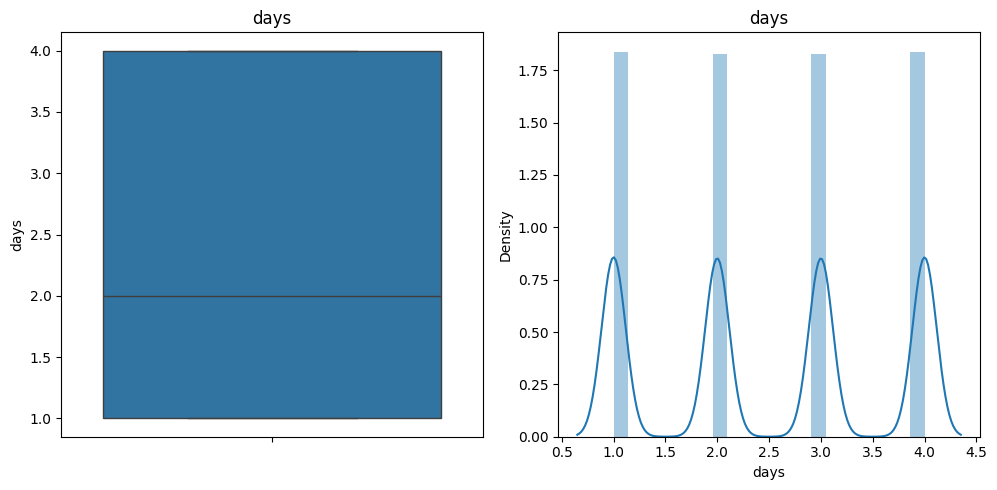

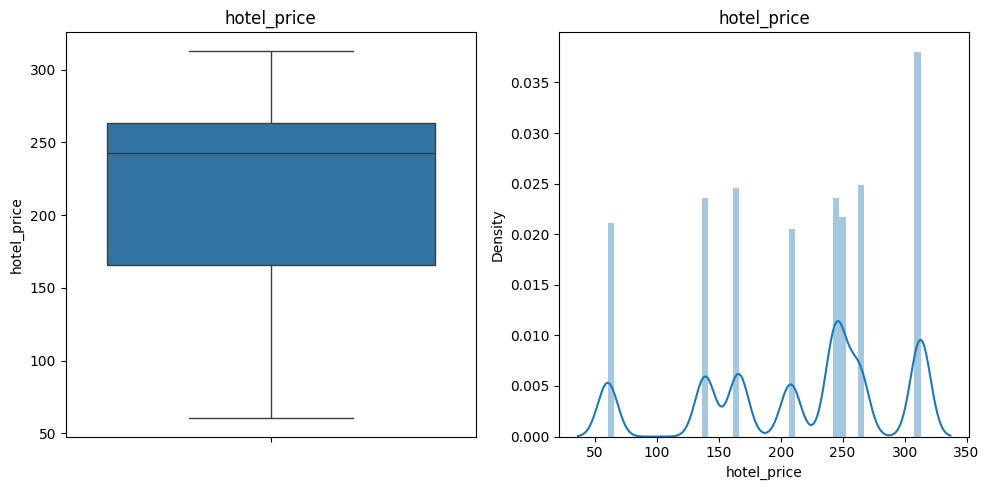

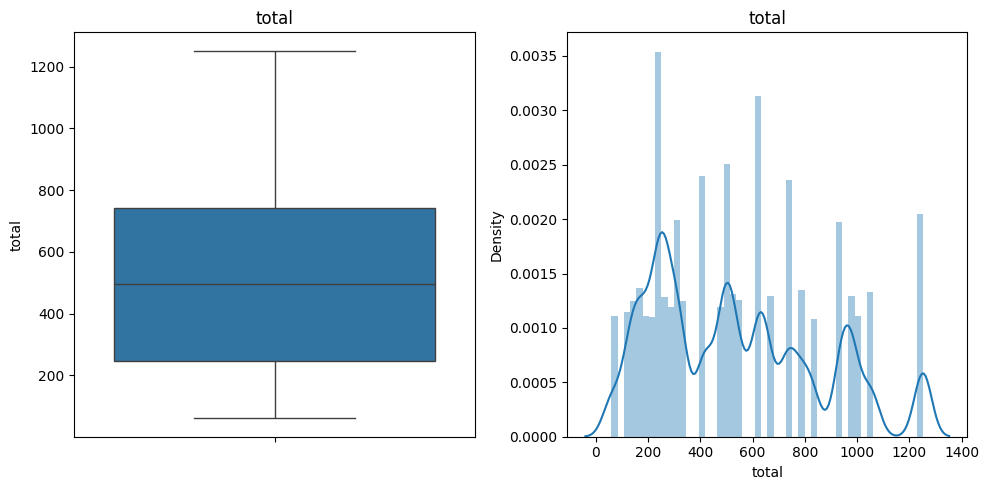

In [ ]:
# Perform Univariate Analysis on modified dataframe data
for col in num_data.columns.to_list():
  #poltting boxplot
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(num_data[col])
    fig.set_title(col)
  #Plotting displot
    plt.subplot(1, 2, 2)
    fig = sns.distplot(num_data[col])
    fig.set_title(col)
    plt.tight_layout()
    plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm

# Hypothesis 1: Flight Prices by Flight Type
# Null Hypothesis: There is no significant difference in flight prices between different flight types.
# Alternate Hypothesis: There is a significant difference in flight prices between different flight types.

# Step 1: Prepare the data
flight_types = flights['flightType'].unique()
price_by_flight_type = [flights[flights['flightType'] == flight_type]['price'] for flight_type in flight_types]

# Step 2: Perform ANOVA test
f_stat, p_value_1 = stats.f_oneway(*price_by_flight_type)

# Step 3: Set the significance level (alpha)
alpha = 0.05

# Step 4: Perform the hypothesis test
if p_value_1 < alpha:
    print("Reject Null Hypothesis: There is a significant difference in flight prices between different flight types.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in flight prices between different flight types.")

# Hypothesis 2: Distance vs Flight Price
# Null Hypothesis: There is no significant relationship between flight distance and flight price.
# Alternate Hypothesis: There is a significant relationship between flight distance and flight price.

# Step 1: Prepare the data
X = flights['distance']
y = flights['price']

# Add a constant term to the independent variable (required for statsmodels)
X = sm.add_constant(X)

# Step 2: Fit the linear regression model
model = sm.OLS(y, X).fit()

# Step 3: Check p-value of the coefficient for 'distance'
p_value_2 = model.pvalues['distance']

# Step 4: Perform the hypothesis test
if p_value_2 < alpha:
    print("Reject Null Hypothesis: There is a significant relationship between flight distance and flight price.")
else:
    print("Fail to reject Null Hypothesis: There is no significant relationship between flight distance and flight price.")

# Hypothesis 3: Flight Prices by Agency
# Null Hypothesis: There is no significant difference in flight prices between different flight agencies.
# Alternate Hypothesis: There is a significant difference in flight prices between different flight agencies.

# Step 1: Prepare the data
agencies = flights['agency'].unique()
price_by_agency = [flights[flights['agency'] == agency]['price'] for agency in agencies]

# Step 2: Perform ANOVA test
f_stat, p_value_3 = stats.f_oneway(*price_by_agency)

# Step 3: Perform the hypothesis test
if p_value_3 < alpha:
    print("Reject Null Hypothesis: There is a significant difference in flight prices between different flight agencies.")
else:
    print("Fail to reject Null Hypothesis: There is no significant difference in flight prices between different flight agencies.")

# Optional: Print the regression summary for Hypothesis 2
print(model.summary())


Reject Null Hypothesis: There is a significant difference in flight prices between different flight types.
Reject Null Hypothesis: There is a significant relationship between flight distance and flight price.
Reject Null Hypothesis: There is a significant difference in flight prices between different flight agencies.
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                 1.905e+05
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:39:54   Log-Likelihood:            -1.9157e+06
No. Observations:              271888   AIC:                         3.831e+06
Df Residuals:                  271886   BIC:                         3.831e+06
Df Model:                           1            

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
flights.isnull().sum()

,0
travelCode,0
userCode,0
from,0
to,0
flightType,0
price,0
time,0
distance,0
agency,0
date,0


In [ ]:
user.isnull().sum()

,0
code,0
company,0
user_name,0
gender,0
age,0


In [ ]:
hotel.isnull().sum()

,0
travelCode,0
userCode,0
hotel_name,0
place,0
days,0
hotel_price,0
total,0
hotel_date,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
flights['flightType'] = flights['flightType'].replace({'economic': 0, 'premium': 1, 'firstClass':3})

In [ ]:
# Convert categorical variables to dummy/indicator variables
flights = pd.get_dummies(flights, columns=['from', 'to', 'flightType', 'agency'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

* I have used ordinal encoding for flightType column because here we can see a perticular order of hireckly or there types

* I have also used one hot encoding for categorical column which does not follow any kind of hirecky


Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction


#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X = flights.drop(columns=['travelCode', 'userCode', 'price', 'date'])
y = flights['price']

##### What all feature selection methods have you used  and why?

* I have drop 'travelCode', 'userCode', 'price', 'date' this column because this columns will not have any impact on flight price predictions.

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data


### 6. Data Splitting

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8.  Data Scaling

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define models to benchmark
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Store metrics for each model
results = []

# Loop through each model
for name, model in models.items():
    print(f"Training: {name}")
    model.fit(X_train, y_train)                 # Train model
    y_pred = model.predict(X_test)             # Predict on test set

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R^2": r2
    })

# Convert to DataFrame for a clean summary
results_df = pd.DataFrame(results)

# Sort by best R² descending
results_df = results_df.sort_values(by="R^2", ascending=False).reset_index(drop=True)

# Show results
print("\nModel Performance Comparison:\n")
print(results_df)


Training: Linear Regression
Training: Ridge Regression
Training: Lasso Regression
Training: ElasticNet Regression
Training: Decision Tree
Training: Random Forest
Training: Gradient Boosting

Model Performance Comparison:

                   Model           MSE        RMSE         MAE       R^2
0          Random Forest      0.238911    0.488785    0.031121  0.999998
1          Decision Tree      2.057082    1.434253    0.028219  0.999984
2      Gradient Boosting   1538.425904   39.222773   31.222925  0.988325
3      Linear Regression  10640.541873  103.153002   81.321205  0.919249
4       Ridge Regression  10641.188855  103.156138   81.297572  0.919244
5       Lasso Regression  10811.336102  103.977575   81.731212  0.917952
6  ElasticNet Regression  39113.071294  197.770249  158.999602  0.703170


#### 2. Cross- Validation & Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store all results
results = []

# Loop over each model
for name, model in models.items():
    print(f"\nRunning cross-validation for: {name}")

    # R^2 Score
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    # Negative Mean Squared Error
    neg_mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    mse_scores = -neg_mse_scores
    rmse_scores = np.sqrt(mse_scores)

    # Negative Mean Absolute Error
    neg_mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mae_scores = -neg_mae_scores

    # Store results
    results.append({
        "Model": name,
        "R^2 Mean": np.mean(r2_scores),
        "R^2 Std": np.std(r2_scores),
        "MSE Mean": np.mean(mse_scores),
        "MSE Std": np.std(mse_scores),
        "RMSE Mean": np.mean(rmse_scores),
        "MAE Mean": np.mean(mae_scores),
        "MAE Std": np.std(mae_scores),
    })

# Convert to DataFrame for clean display
results_df = pd.DataFrame(results)

# Sort by best R^2
results_df = results_df.sort_values(by="R^2 Mean", ascending=False).reset_index(drop=True)

print("\nCross-Validation Results:\n")
print(results_df)



Running cross-validation for: Linear Regression

Running cross-validation for: Ridge Regression

Running cross-validation for: Lasso Regression

Running cross-validation for: ElasticNet Regression

Running cross-validation for: Decision Tree

Running cross-validation for: Random Forest

Running cross-validation for: Gradient Boosting

Cross-Validation Results:

                   Model  R^2 Mean       R^2 Std      MSE Mean    MSE Std  \
0          Random Forest  0.999999  8.239576e-07      0.217812   0.108461   
1          Decision Tree  0.999993  6.260905e-06      0.960925   0.827793   
2      Gradient Boosting  0.988123  3.122071e-04   1559.093653  41.912860   
3      Linear Regression  0.919348  3.852070e-04  10586.962346  49.253380   
4       Ridge Regression  0.919337  3.852010e-04  10588.434336  48.837974   
5       Lasso Regression  0.918100  4.381628e-04  10750.776799  56.232054   
6  ElasticNet Regression  0.702957  3.397410e-04  38992.143157  89.404354   

    RMSE Mean    M

target                      1.000000
distance                    0.641915
time                        0.641800
flightType_3                0.534265
flightType_0                0.520803
to_Florianopolis (SC)       0.325688
to_Sao Paulo (SP)           0.263119
agency_FlyingDrops          0.257471
to_Salvador (BH)            0.219528
to_Brasilia (DF)            0.187977
to_Campo Grande (MS)        0.122579
to_Aracaju (SE)             0.118577
to_Natal (RN)               0.111554
from_Salvador (BH)          0.098056
agency_CloudFy              0.091874
agency_Rainbow              0.090015
to_Rio de Janeiro (RJ)      0.078381
flightType_1                0.064745
from_Natal (RN)             0.039337
from_Florianopolis (SC)     0.033345
from_Recife (PE)            0.033014
from_Sao Paulo (SP)         0.026215
from_Brasilia (DF)          0.024236
from_Rio de Janeiro (RJ)    0.018969
year                        0.007291
to_Recife (PE)              0.006025
day                         0.003572
f

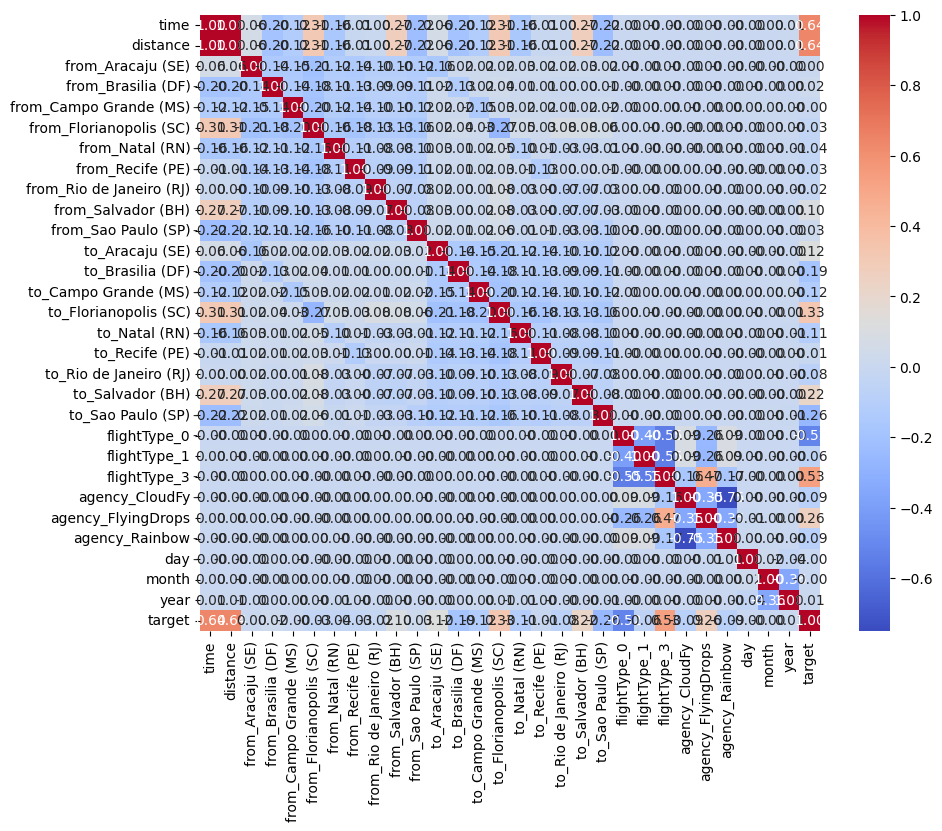

In [ ]:
# Visualizing evaluation Metric Score chart
import seaborn as sns
import matplotlib.pyplot as plt

# Add target to DataFrame
df_with_target = pd.DataFrame(X)
df_with_target['target'] = y

# Compute correlations
corr_matrix = df_with_target.corr().abs().sort_values('target', ascending=False)

# Display correlations
print(corr_matrix['target'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_with_target.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_

# Pair with feature names
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features = features.sort_values(by='Importance', ascending=False)

print(features)


                     Feature  Importance
22              flightType_3    0.296606
1                   distance    0.240191
0                       time    0.234726
21              flightType_1    0.072124
5    from_Florianopolis (SC)    0.049949
11           to_Aracaju (SE)    0.021411
14     to_Florianopolis (SC)    0.014578
10       from_Sao Paulo (SP)    0.012096
3         from_Brasilia (DF)    0.009290
19         to_Sao Paulo (SP)    0.007288
15             to_Natal (RN)    0.006598
18          to_Salvador (BH)    0.006026
20              flightType_0    0.004847
13      to_Campo Grande (MS)    0.003258
12          to_Brasilia (DF)    0.003250
4     from_Campo Grande (MS)    0.002557
9         from_Salvador (BH)    0.002448
6            from_Natal (RN)    0.002269
23            agency_CloudFy    0.002053
25            agency_Rainbow    0.002037
17    to_Rio de Janeiro (RJ)    0.001759
2          from_Aracaju (SE)    0.001605
24        agency_FlyingDrops    0.000962
16            to

### ML Model for classification

In [ ]:
# Importing user dataset
url = 'https://drive.google.com/file/d/1JSbbrQKr-9oGQYQbRv9ALOMWrbaoq1lo/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='latin1')

In [ ]:
df = df[df['gender']!='none']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

def train_model(df):
    # Encode gender labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['gender'])

    # Load the sentence transformer model
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    df['first_name'] =df['name'].apply(lambda x: x.split()[0])

    # Generate embeddings for names (using only first names)
    first_names = df['first_name'].tolist()
    embeddings = model.encode(first_names, show_progress_bar=True)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        embeddings, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train a logistic regression classifier
    classifier = LogisticRegression(max_iter=1000, random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

    # Create visualization of embeddings
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Save the model
    model_data = {
        'classifier': classifier,
        'label_encoder': label_encoder,
        'model_name': 'sentence-transformers/all-MiniLM-L6-v2'
    }
    joblib.dump(classifier, 'classifier.pkl')
    joblib.dump(label_encoder, 'label_encoder.pkl')
    joblib.dump(pca, 'pca.pkl')
    joblib.dump(model_data, 'name_gender_classifier.pkl')

    return {
        'accuracy': accuracy,
        'report': report,
        'label_encoder': label_encoder,
        'reduced_embeddings': reduced_embeddings,
        'genders': df['gender']
    }

train_model(df)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

# joblib.dump(classifier, 'classifier.pkl')
# joblib.dump(label_encoder, 'label_encoder.pkl')
# joblib.dump(pca, 'pca.pkl')
# joblib.dump(model_data, 'name_gender_classifier.pkl')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.


def predict_gender(name):
    model_file = '/content/name_gender_classifier.pkl'

    model_data = joblib.load(model_file)
    classifier = model_data['classifier']
    label_encoder = model_data['label_encoder']

    sentence_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    embedding = sentence_model.encode([name])

    prediction = classifier.predict(embedding)
    probability = classifier.predict_proba(embedding)

    gender = label_encoder.inverse_transform(prediction)[0]
    confidence = max(probability[0]) * 100

    return gender, confidence

# Example usage:
name = "Alex"
predicted_gender, confidence = predict_gender(name)
print(f"Predicted Gender: {predicted_gender} ({confidence:.1f}% confidence)")


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



The project successfully demonstrates how data analytics and machine learning can revolutionize the travel industry by enhancing predictive capabilities and personalizing user experiences. By developing a flight price prediction model, a gender classification model, and a hotel recommendation system, we provide valuable tools for both travelers and travel agencies. The integration of MLOps practices, including containerization, scalable deployment, automated workflows, and model tracking, ensures efficient and reliable operations, positioning the project as a robust solution for modern travel challenges.Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***